In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/merdo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ts = pd.read_csv("timeseries.csv")

In [3]:
ts.head()

,Unnamed: 0,Attack,Model,Dataset,TrainRegularAccuracy,TrainAdversarialAccuracy,ValRegularAccuracy,ValAdversarialAccuracy
0,0,PGD_inf_0.1,FCN,UCR_ECG200,0.930000,0.53000,0.890000,0.510000
1,1,PGD_inf_0.1,MLP,UCR_ECG200,0.930000,0.79000,0.860000,0.720000
2,2,PGD_inf_0.1,resnet,UCR_ECG200,0.880000,0.57000,0.780000,0.530000
3,3,PGD_inf_0.1,FCN,UCR_ElectricDevices,0.913063,0.40298,0.717546,0.302295
4,4,PGD_inf_0.1,MLP,UCR_ElectricDevices,0.269550,0.26955,0.242381,0.242381


In [4]:
acc_df = []
modes = ["ValRegularAccuracy", "ValAdversarialAccuracy"]

for i, row in ts.iterrows():
    for mode in modes:
        new_row = {}
        new_row["Dataset"] = row["Dataset"]
        new_row["Model"] = row["Model"]
        new_row["Type"] = mode
        new_row["Accuracy"] = row[mode]
        acc_df.append(new_row)
acc_df = pd.DataFrame.from_records(acc_df)

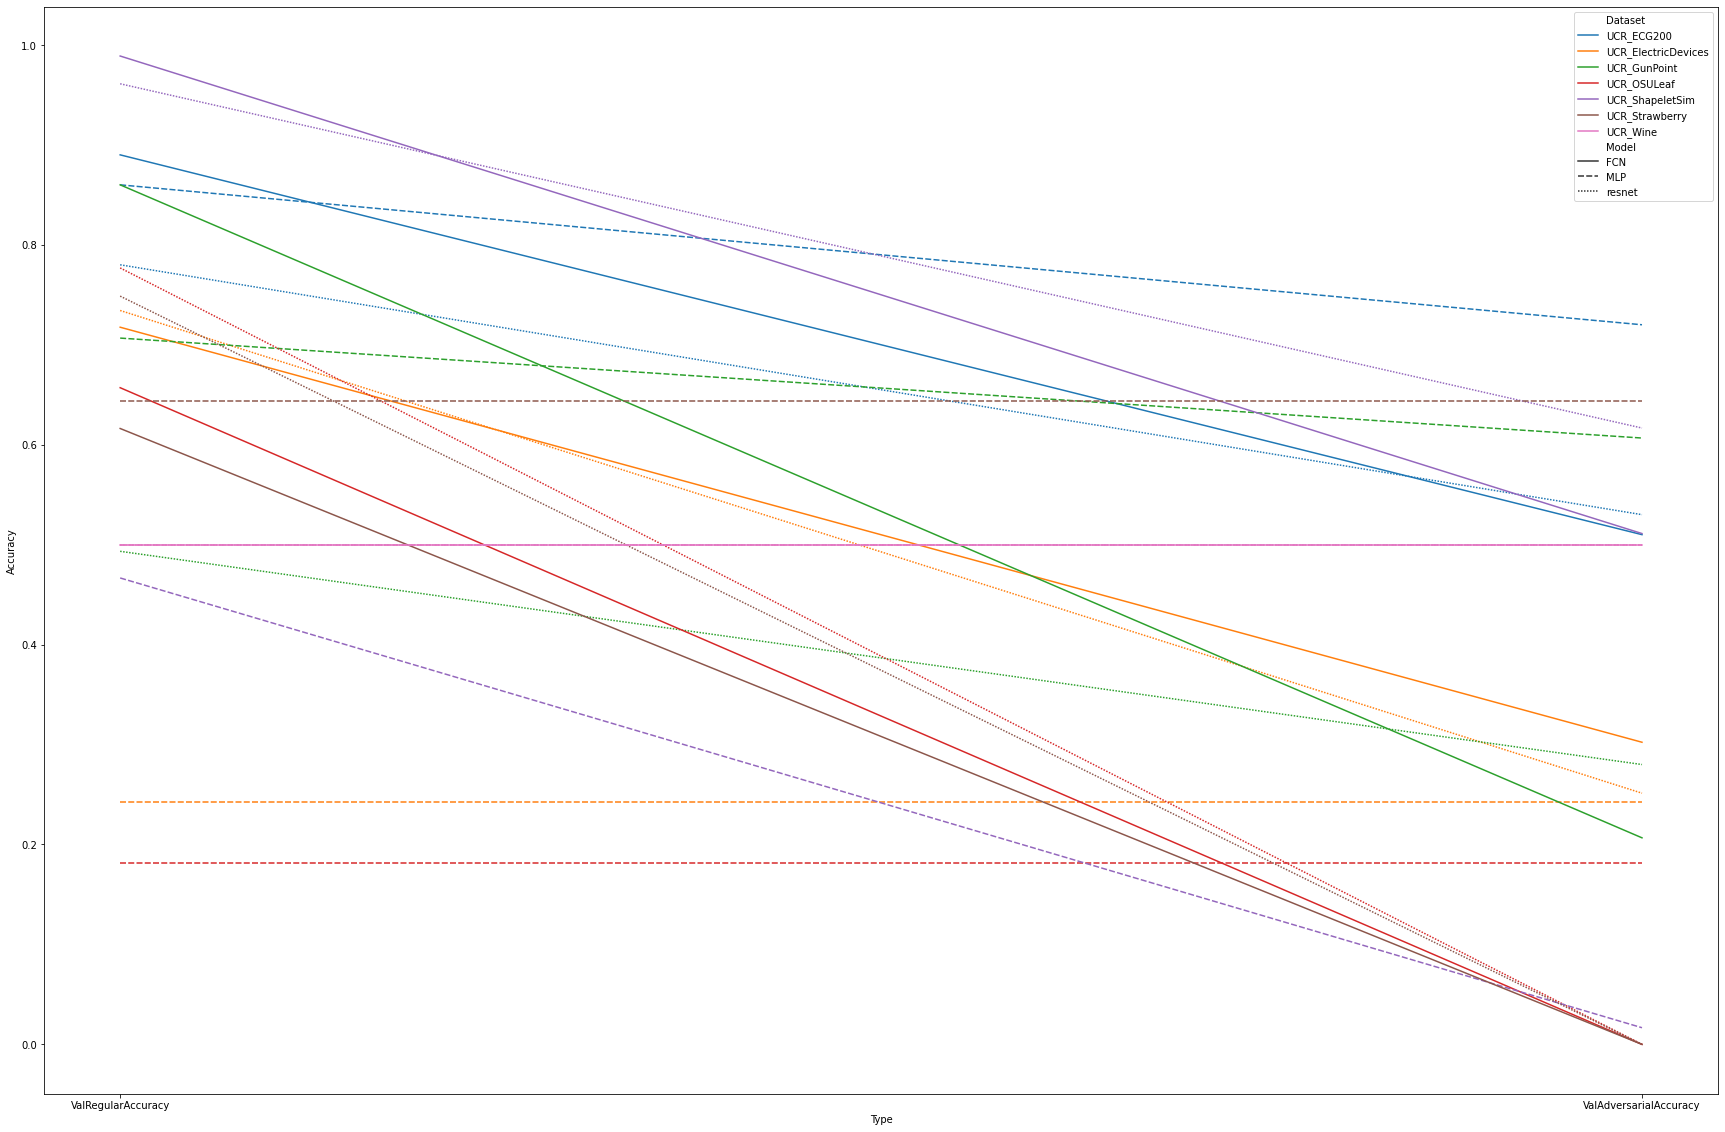

In [8]:
fig, axs = plt.subplots(1,1, figsize=(30,20))
sns.lineplot(x="Type", y="Accuracy", style="Model", hue="Dataset", data=acc_df, sort=False, ax=axs)
fig.savefig("./initial_results.png")

In [12]:
piv = ts.pivot(columns="Model", index="Dataset", values=["ValRegularAccuracy", "ValAdversarialAccuracy"])

In [14]:
piv

ValRegularAccuracy                      \
Model                              FCN       MLP    resnet   
Dataset                                                      
UCR_ECG200                    0.890000  0.860000  0.780000   
UCR_ElectricDevices           0.717546  0.242381  0.734276   
UCR_GunPoint                  0.860000  0.706667  0.493333   
UCR_OSULeaf                   0.657025  0.181818  0.776860   
UCR_ShapeletSim               0.988889  0.466667  0.961111   
UCR_Strawberry                0.616216  0.643243  0.748649   
UCR_Wine                      0.500000  0.500000  0.500000   

                    ValAdversarialAccuracy                          
Model                                  FCN       MLP        resnet  
Dataset                                                             
UCR_ECG200                    5.100000e-01  0.720000  5.300000e-01  
UCR_ElectricDevices           3.022954e-01  0.242381  2.513293e-01  
UCR_GunPoint                  2.066666e-01  0.606667  2.800000e-01  
UCR_OSULeaf                   5.960464e-08  0.181818  5.960464e-08  
UCR_ShapeletSim               5.111111e-01  0.016667  6.166667e-01  
UCR_Strawberry                0.000000e+00  0.643243  0.000000e+00  
UCR_Wine                      5.000000e-01  0.500000  5.000000e-01

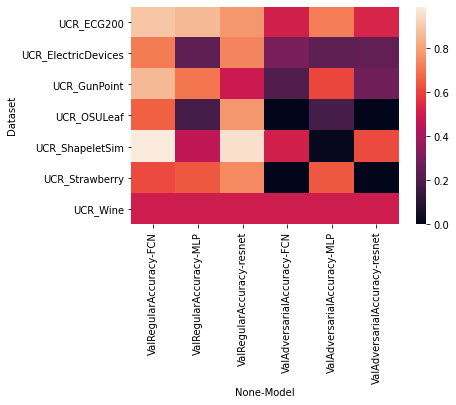

In [13]:
sns.heatmap(data=piv)